In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("car sales.csv")

In [3]:
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


In [4]:
df.shape

(23906, 16)

In [5]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

## Analysis

In [6]:
VehiclesSold=df['Car_id'].count()
VehiclesSold

np.int64(23906)

The number of vehicles sold were: 23906

### Count of sales by gender

In [7]:
### Count of sales by gender
countOfSalesByGender=df['Gender'].value_counts()
countOfSalesByGender

Gender
Male      18798
Female     5108
Name: count, dtype: int64

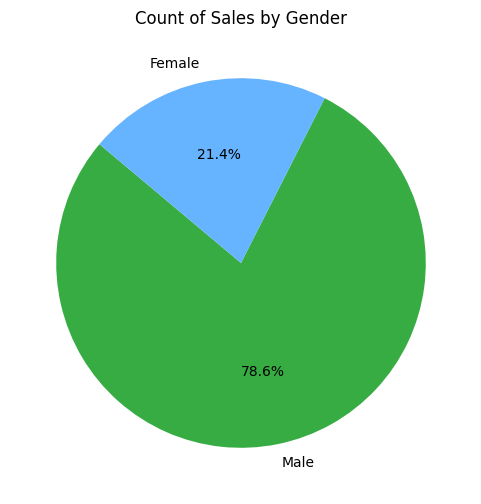

In [8]:
# Visualize as Pie Chart
plt.figure(figsize=(6, 6))
countOfSalesByGender.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#36ac43','#66b3ff'])
plt.title('Count of Sales by Gender')
plt.ylabel('')  # Hide the y-label
plt.show()

### Income by Gender

In [9]:
Incomebygender=df.groupby('Gender')['Annual Income'].mean().round(2)
Incomebygender

Gender
Female    755973.02
Male      851184.04
Name: Annual Income, dtype: float64

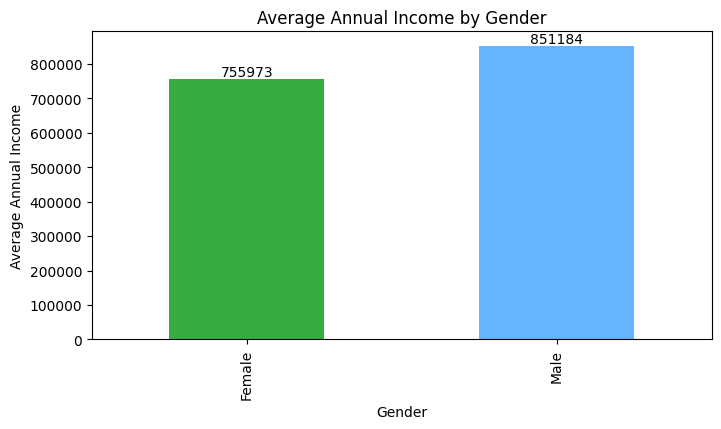

In [10]:
plt.figure(figsize=(8,4))
ax=Incomebygender.plot(kind='bar', color=['#36ac43','#66b3ff'])
plt.title('Average Annual Income by Gender')
plt.ylabel('Average Annual Income')
plt.xlabel('Gender')

# Adding data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

### Amount Spent by Gender 

In [11]:
AmountSpentbygender=df.groupby('Gender')['Price ($)'].sum().round(2)
AmountSpentbygender

Gender
Female    144440271
Male      527085194
Name: Price ($), dtype: int64

## Dealer

### Number of Vehicles sold by each dealer

In [12]:
VehiclesSold=df.groupby('Dealer_Name')['Car_id'].count()
VehiclesSold    

Dealer_Name
Buddy Storbeck's Diesel Service Inc                 627
C & M Motors Inc                                    625
Capitol KIA                                         628
Chrysler Plymouth                                   625
Chrysler of Tri-Cities                              626
Classic Chevy                                       623
Clay Johnson Auto Sales                             627
Diehl Motor CO Inc                                  624
Enterprise Rent A Car                               625
Gartner Buick Hyundai Saab                          628
Hatfield Volkswagen                                 629
Iceberg Rentals                                     627
McKinney Dodge Chrysler Jeep                        629
Motor Vehicle Branch Office                         626
Nebo Chevrolet                                      633
New Castle Ford Lincoln Mercury                     629
Pars Auto Sales                                     630
Pitre Buick-Pontiac-Gmc of Scottsdal

### Amount Earned by Each Dealer

In [13]:
AmountEarned=df.groupby('Dealer_Name')['Price ($)'].sum().round(2)
AmountEarned=AmountEarned.sort_values(ascending=False)
AmountEarned

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Saab-Belle Dodge                                   35265865
Scrivener Performance Engineering                  35258525
Star Enterprises Inc                               35113206
Tri-State Mack Inc                                 35091357
Suburban Ford                                      34943473
Ryder Truck Rental and Leasing                     34837906
Iceberg Rentals                                    17883895
Classic Chevy                                      17819055
Gartner Buick Hyundai Saab                         17739506
Capitol KIA                                        17703134
Enterprise Rent A Car                              17695363
Pars Auto Sales                                    17648228
Nebo Chevrolet              

## Vehicle

### Number of Vehicles Sold by Type

In [14]:
VehicleManufacturers=df.groupby('Company')['Car_id'].count()
VehicleManufacturers=VehicleManufacturers.sort_values(ascending=False)
VehicleManufacturers

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Car_id, dtype: int64

### Most Prefered Vehicle Color 

In [15]:
VehicleColor=df.groupby('Color')['Car_id'].count()
VehicleColor=VehicleColor.sort_values(ascending=False)  
VehicleColor    

Color
Pale White    11256
Black          7857
Red            4793
Name: Car_id, dtype: int64

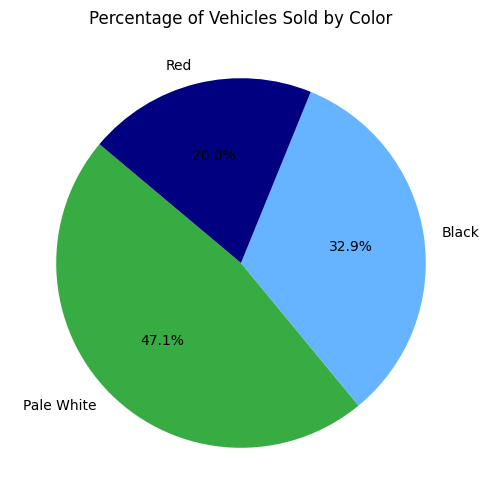

In [16]:
plt.figure(figsize=(6,6))
plt.pie(VehicleColor, labels=VehicleColor.index, autopct='%1.1f%%', startangle=140, colors=['#36ac43','#66b3ff','#000080'])
plt.title('Percentage of Vehicles Sold by Color')  
plt.show() 

### Type of Transmission Sold

In [17]:
TransmissionType=df.groupby('Transmission')['Car_id'].count()
TransmissionType=TransmissionType.sort_values(ascending=False)          
TransmissionType

Transmission
Auto      12571
Manual    11335
Name: Car_id, dtype: int64

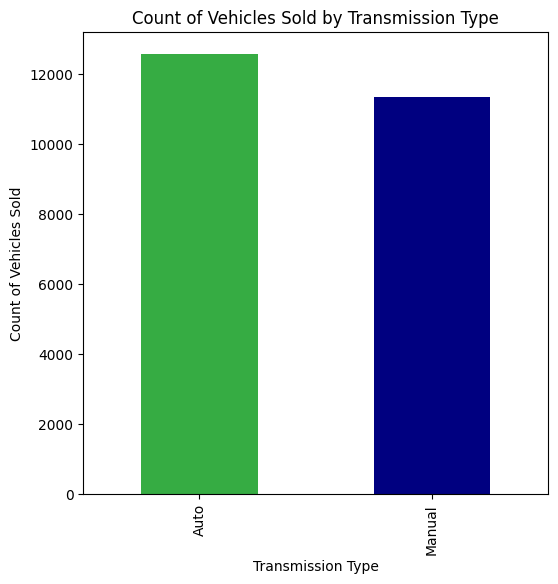

In [19]:
plt.figure(figsize=(6,6))
TransmissionType.plot(kind='bar', color=['#36ac43','#000080'])
plt.title('Count of Vehicles Sold by Transmission Type')        
plt.ylabel('Count of Vehicles Sold')
plt.xlabel('Transmission Type') 
plt.show()

### Preferred Body Style

In [21]:
BodyType=df.groupby('Body Style')['Car_id'].count()
BodyType=BodyType.sort_values(ascending=False)  
BodyType

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: Car_id, dtype: int64

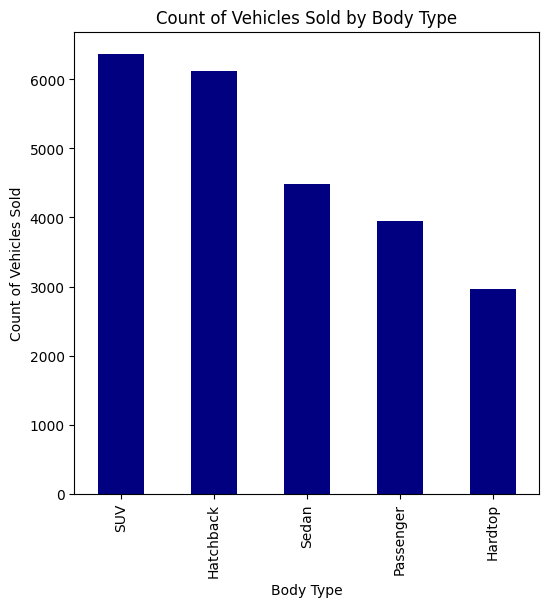

In [22]:
plt.figure(figsize=(6,6))
BodyType.plot(kind='bar', color=['#000080'])  
plt.title('Count of Vehicles Sold by Body Type')
plt.ylabel('Count of Vehicles Sold')
plt.xlabel('Body Type')
plt.show()